In [ ]:
"""
Problem Statement No. 09 
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.  
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset    
Use  iris.csv Diabetes.csv 
"""

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.drop('Id',axis = 1 , inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
67,5.8,2.7,4.1,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y= df['Species']

In [10]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=5)

In [14]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
69,5.6,2.5,3.9,1.1
17,5.1,3.5,1.4,0.3
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [15]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5


In [16]:
y_train

40         Iris-setosa
115     Iris-virginica
142     Iris-virginica
69     Iris-versicolor
17         Iris-setosa
            ...       
8          Iris-setosa
73     Iris-versicolor
144     Iris-virginica
118     Iris-virginica
99     Iris-versicolor
Name: Species, Length: 112, dtype: object

In [17]:
y_test

82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
57     Iris-versicolor
1          Iris-setosa
70     Iris-versicolor
25         Iris-setosa
84     Iris-versicolor
66     Iris-versicolor
133     Iris-virginica
102     Iris-virginica
107     Iris-virginica
26         Iris-setosa
23         Iris-setosa
123     Iris-virginica
130     Iris-virginica
21         Iris-setosa
12         Iris-setosa
71     Iris-versicolor
128     Iris-virginica
48         Iris-setosa
72     Iris-versicolor
88     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
39         Iris-setosa
53     Iris-versicolor
79     Iris-versicolor
10         Iris-setosa
50     Iris-versicolor
49         Iris-setosa
43         Iris-setosa
135     Iris-virginica
Name: Species, dtype: object

In [18]:
x_train.shape

(112, 4)

In [19]:
x_test.shape

(38, 4)

In [20]:
y_train.shape

(112,)

In [21]:
y_test.shape

(38,)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms = MinMaxScaler()

In [24]:
mms.fit(x_train)

MinMaxScaler()

In [25]:
x_train_scaled = mms.transform(x_train)

In [27]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)

In [28]:
x_train_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.194444,0.625000,0.050847,0.083333
1,0.583333,0.500000,0.728814,0.916667
2,0.416667,0.291667,0.694915,0.750000
3,0.361111,0.208333,0.491525,0.416667
4,0.222222,0.625000,0.067797,0.083333
...,...,...,...,...
107,0.027778,0.375000,0.067797,0.041667
108,0.500000,0.333333,0.627119,0.458333
109,0.666667,0.541667,0.796610,1.000000
110,0.944444,0.250000,1.000000,0.916667


In [29]:
x_test_scaled = mms.transform(x_test)

In [30]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [31]:
x_test_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.416667,0.291667,0.491525,0.458333
1,0.500000,0.250000,0.779661,0.541667
2,0.416667,0.333333,0.694915,0.958333
3,0.027778,0.500000,0.050847,0.041667
4,0.805556,0.666667,0.864407,1.000000
5,0.166667,0.166667,0.389831,0.375000
6,0.166667,0.416667,0.067797,0.041667
7,0.444444,0.500000,0.644068,0.708333
8,0.194444,0.416667,0.101695,0.041667
9,0.305556,0.416667,0.593220,0.583333


In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gnb = GaussianNB()

In [34]:
y_pred = gnb.fit(x_train_scaled,y_train).predict(x_test_scaled)

In [35]:
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype='<U15')

In [36]:
from sklearn.metrics import (
confusion_matrix,
accuracy_score,
recall_score,
precision_score
)

In [37]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [38]:
conf_matrix

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]], dtype=int64)

In [39]:
Accuracy = accuracy_score(y_test,y_pred)

In [40]:
Accuracy

0.9210526315789473

In [50]:
ErrorRate = 1 - Accuracy

In [51]:
ErrorRate

0.07894736842105265

In [42]:
Recall = recall_score(y_test,y_pred,average='weighted')

In [43]:
Recall

0.9210526315789473

In [45]:
Precision = precision_score(y_test,y_pred,average = 'weighted')

In [47]:
Precision

0.9221690590111642

In [48]:
import seaborn as sns

<AxesSubplot:>

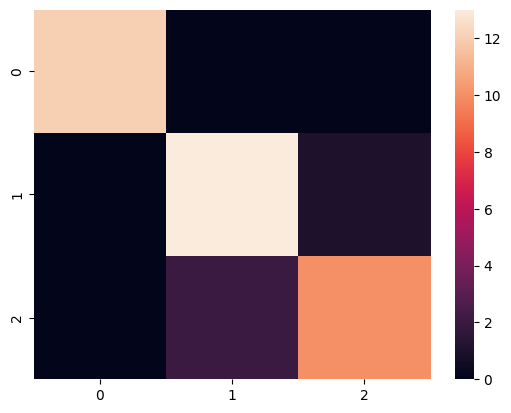

In [49]:
sns.heatmap(conf_matrix)